# Exploración de Datos Multidimensionales
Este Laboratorio es Basado en el Curso de Dimensionality Reduction de DATACAMP®


En este laboratorio se presentará el concepto de reducción de dimensionalidad y aprenderá cuándo y por qué esto es importante. Aprenderá la diferencia entre la selección de características y la extracción de características y aplicará ambas técnicas para la exploración de datos. Al final se  termina con una lección sobre t-SNE, una poderosa técnica de extracción de características que le permitirá visualizar un conjunto de datos de alta dimensión.


Encontrar el número de dimensiones en un conjunto de datos

Se ha cargado una muestra más grande del conjunto de datos de Pokemon como el marco de datos de Pandas pokemon_df.

In [3]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pokemon_df=pd.read_csv("pokemon-c.csv")#reading a dataset in a dataframe using pandas

¿Cuántas dimensiones o columnas hay en este conjunto de datos?

In [4]:
pokemon_df.shape
for col in pokemon_df.columns: 
    print(col)

HP
Attack
Defense
Generation
Name
Type
Legendary


In [5]:
pokemon_df.shape

(160, 7)

In [6]:
pokemon_df.describe()

,HP,Attack,Defense,Generation
count,160.00000,160.00000,160.000000,160.0
mean,64.61250,74.98125,70.175000,1.0
std,27.92127,29.18009,28.883533,0.0
min,10.00000,5.00000,5.000000,1.0
25%,45.00000,52.00000,50.000000,1.0
50%,60.00000,71.00000,65.000000,1.0
75%,80.00000,95.00000,85.000000,1.0
max,250.00000,155.00000,180.000000,1.0


In [7]:
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense']

Combine las dos listas de nombres de características para sub-seleccionar las características elegidas pokemon_df.

In [8]:
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']


# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type']

pokemon_df[non_number_cols].describe(exclude='number')

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name   Type
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


Busque la característica no numérica sin variación y elimine su nombre de la lista asignada a non_number_cols.

In [9]:
pokemon_df.describe(exclude='number')




,Name,Type,Legendary
count,160,160,160
unique,159,15,1
top,Nidoran?,Water,False
freq,2,31,160


In [10]:
# Remove the column
non_number_cols = ['Name', 'Type']

In [11]:
# Combine the final result
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name   Type
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


De esta manera, el dataset de Pokemon ha sido depurado mediante diferentes técnicas.

# Inspección visual de características redundantes
La visualización de datos es un paso crucial en cualquier exploración de datos. Usemos Seaborn para explorar algunas muestras del conjunto de datos de medidas corporales ANSUR del Ejército de EE. UU.

Se han precargado dos muestras de datos como ansur_df_1y ansur_df_2.

Seaborn ha sido importado como sns.


In [12]:
ansur_df_1=pd.read_csv("ansur_df1.csv")#reading a dataset in a dataframe using pandas
ansur_df_2=pd.read_csv("ansur_df2.csv")#reading a dataset in a dataframe using pandas
import seaborn as sns

In [13]:
ansur_df_1.shape

(200, 4)

In [14]:
ansur_df_2.shape

(200, 4)

Cree una gráfica del dataset ansur_df_1 y muestra de datos y coloree los puntos con la función 'Gender' .

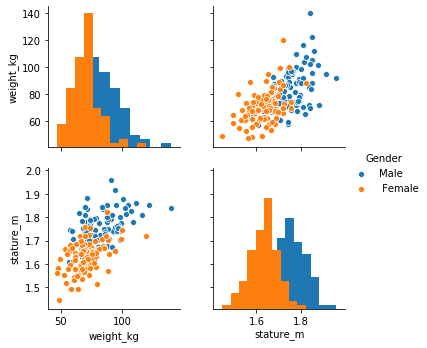

In [15]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')# Show the plot
plt.show()

Dos características realmente son básicamente duplicadas, elimine una de ellas del conjunto de datos.

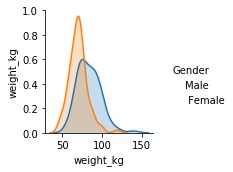

In [16]:
# Remove one of the redundant features
reduced_df = ansur_df_1.drop('stature_m', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')
# Show the plot
plt.show()

Ahora cree un diagrama de pares del dataset ansur_df_2, muestre los datos y coloree los puntos con la función 'Gender'.

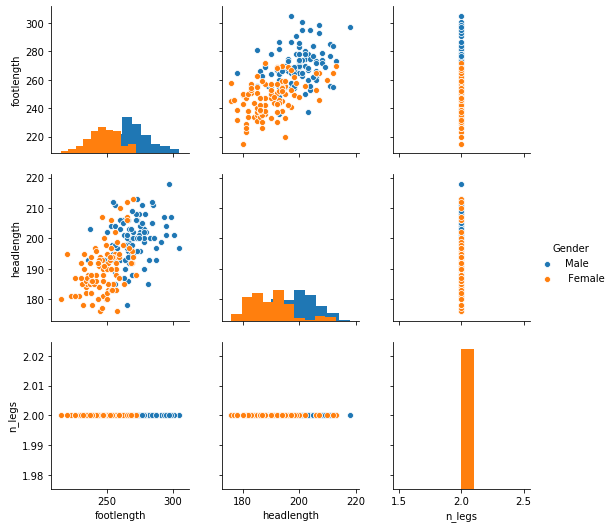

In [17]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')


# Show the plot
plt.show()

Una característica no tiene varianza, remuévala del dataset.

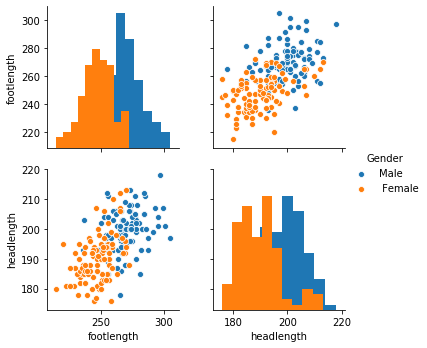

In [18]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop('n_legs', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

# Ajuste de t-SNE a los datos ANSUR
t-SNE es una gran técnica para la exploración visual de conjuntos de datos de alta dimensión. En este ejercicio, lo aplicará al conjunto de datos ANSUR. Eliminará las columnas no numéricas del conjunto de datos precargado dfy se ajustará TSNEa su conjunto de datos numéricos.
Primero Cargaremos los datos del Dataset ANSUR


In [19]:
df_1=pd.read_csv("ANSUR_II_FEMALE.csv")

In [20]:
df_1.shape


(1986, 99)

Debemos identificar cuales de las caracetrísticas del dataset no son numéricas

In [21]:
# Non-numerical columns in the dataset
df_1.describe(exclude='number')

,Branch,Component,Gender,BMI_class,Height_class
count,1986,1986,1986,1986,1986
unique,3,3,1,3,3
top,Combat Service Support,Regular Army,Female,Overweight,Normal
freq,1256,1020,1986,1037,1497


Crearemos un arreglo con el nombre de las columnas no numericas a eliminar y las elimanamos del dataset.

In [22]:
non_numeric = ['BMI_class', 'Height_class',
'Gender', 'Component', 'Branch']
df_numeric = df_1.drop(non_numeric, axis=1)
df_numeric.shape

(1986, 94)

Creamos un t-SNE con una rata de aprendizaje de 50, y lo ajustamos en el dataset numérico que hemo definido

In [23]:
from sklearn.manifold import TSNE
# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(1986, 2)


Mostramos los 4 primeros parámetros TSNE obtenidos

In [24]:
tsne_features.shape()

TypeError: 'tuple' object is not callable

In [25]:
tsne_features[1:4,:]

array([[  1.4119648, -40.423725 ],
       [ 17.181917 , -28.880377 ],
       [ 25.759243 ,   3.679103 ]], dtype=float32)

Se asignan estos parámetros TSNE al dataset

In [25]:
df_1['x'] = tsne_features[:,0]
df_1['y'] = tsne_features[:,1]

Graficar el t-SNE

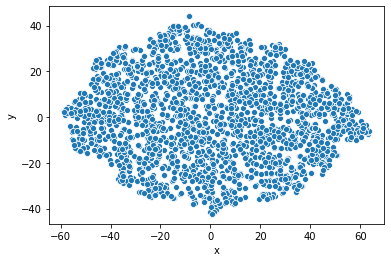

In [26]:
import seaborn as sns
sns.scatterplot(x="x", y="y", data=df_1)
# Show the plot
plt.show()

Colorear los puntos de acuerdo al BMI (Indice de masa corporal)

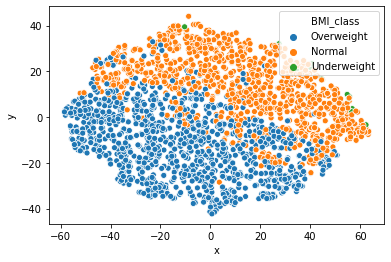

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x="x", y="y", hue='BMI_class', data=df_1)

# Show the plot
plt.show()

Colorear los puntos de acuerdo a la estatura

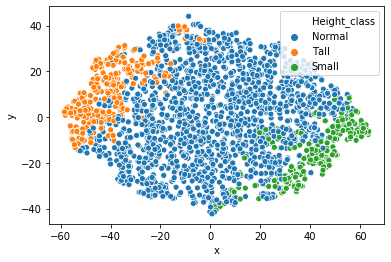

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x="x", y="y", hue='Height_class', data=df_1)
# Show the plot
plt.show()
              
# Show the plot
plt.show()

Así , hemos aplicado reducción y proyección de la dimensionalidad, para una mejor visualización de los datos.